In [3]:
#conda install yfinance

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# Define the ticker symbols for the European indices
tickers = ["^FTSE", "^GDAXI", "^FCHI", "^STOXX50E"]

In [48]:
# Define the time period for the data
start_date = "2020-01-01"  # Start date
end_date = "2024-12-31"    # End date

In [49]:
# Create an empty dictionary to store the data
data = {}

In [50]:
for ticker in tickers:
    try:
        # Download the data using yfinance
        data[ticker] = yf.download(ticker, start=start_date, end=end_date)

        # Print a message to confirm successful download
        print(f"Downloaded data for {ticker}")

    except Exception as e:
        # Handle any errors during download
        print(f"Error downloading data for {ticker}: {e}")


[*********************100%%**********************]  1 of 1 completed

C:\Users\ikech\.conda\envs\datataa\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\ikech\.conda\envs\datataa\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



Downloaded data for ^FTSE
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ^GDAXI
[*********************100%%**********************]  1 of 1 completed

C:\Users\ikech\.conda\envs\datataa\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



Downloaded data for ^FCHI
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ^STOXX50E


C:\Users\ikech\.conda\envs\datataa\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [51]:
data['^FTSE']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,7542.399902,7624.799805,7542.399902,7604.299805,7604.299805,482206700
2020-01-03,7604.299805,7626.399902,7551.000000,7622.399902,7622.399902,475628900
2020-01-06,7622.399902,7622.399902,7528.100098,7575.299805,7575.299805,516783400
2020-01-07,7575.299805,7604.600098,7562.100098,7573.899902,7573.899902,511576100
2020-01-08,7573.899902,7579.500000,7525.000000,7574.899902,7574.899902,606225000
...,...,...,...,...,...,...
2024-12-20,8105.299805,8105.799805,8002.299805,8084.600098,8084.600098,1608807700
2024-12-23,8084.600098,8111.399902,8051.899902,8102.700195,8102.700195,573891100
2024-12-24,8102.700195,8152.000000,8102.700195,8137.000000,8137.000000,243246600


In [52]:
all_data = pd.concat(data, keys=data.keys(), names=['Index', 'Date'])

In [53]:
all_data

Open         High          Low        Close  \
Index     Date                                                             
^FTSE     2020-01-02  7542.399902  7624.799805  7542.399902  7604.299805   
          2020-01-03  7604.299805  7626.399902  7551.000000  7622.399902   
          2020-01-06  7622.399902  7622.399902  7528.100098  7575.299805   
          2020-01-07  7575.299805  7604.600098  7562.100098  7573.899902   
          2020-01-08  7573.899902  7579.500000  7525.000000  7574.899902   
...                           ...          ...          ...          ...   
^STOXX50E 2024-12-19  4916.319824  4916.319824  4869.109863  4879.000000   
          2024-12-20  4861.589844  4872.660156  4803.200195  4862.279785   
          2024-12-23  4859.040039  4862.509766  4832.149902  4852.930176   
          2024-12-27  4854.160156  4898.879883  4847.890137  4898.879883   
          2024-12-30  4890.520020  4904.080078  4862.160156  4869.279785   

                        Adj Close     Volume  
Index     Date                                
^FTSE     2020-01-02  7604.299805  482206700  
          2020-01-03  7622.399902  475628900  
          2020-01-06  7575.299805  516783400  
          2020-01-07  7573.899902  511576100  
          2020-01-08  7574.899902  606225000  
...                           ...        ...  
^STOXX50E 2024-12-19  4879.000000   23122400  
          2024-12-20  4862.279785   52536500  
          2024-12-23  4852.930176   13206800  
          2024-12-27  4898.879883   17347300  
          2024-12-30  4869.279785   14296800  

[5078 rows x 6 columns]

In [81]:
# Save to csv 
for ticker in tickers:
    data[ticker].to_csv(f"{ticker}_data.csv")

all_data.to_csv("all_indices_data.csv")


In [15]:
# Print the first few rows of one of the DataFrames to check
print(data["^FTSE"].head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  7542.399902  7624.799805  7542.399902  7604.299805  7604.299805   
2020-01-03  7604.299805  7626.399902  7551.000000  7622.399902  7622.399902   
2020-01-06  7622.399902  7622.399902  7528.100098  7575.299805  7575.299805   
2020-01-07  7575.299805  7604.600098  7562.100098  7573.899902  7573.899902   
2020-01-08  7573.899902  7579.500000  7525.000000  7574.899902  7574.899902   

               Volume  
Date                   
2020-01-02  482206700  
2020-01-03  475628900  
2020-01-06  516783400  
2020-01-07  511576100  
2020-01-08  606225000  


In [54]:
print(all_data.head())

                         Open         High          Low        Close  \
Index Date                                                             
^FTSE 2020-01-02  7542.399902  7624.799805  7542.399902  7604.299805   
      2020-01-03  7604.299805  7626.399902  7551.000000  7622.399902   
      2020-01-06  7622.399902  7622.399902  7528.100098  7575.299805   
      2020-01-07  7575.299805  7604.600098  7562.100098  7573.899902   
      2020-01-08  7573.899902  7579.500000  7525.000000  7574.899902   

                    Adj Close     Volume  
Index Date                                
^FTSE 2020-01-02  7604.299805  482206700  
      2020-01-03  7622.399902  475628900  
      2020-01-06  7575.299805  516783400  
      2020-01-07  7573.899902  511576100  
      2020-01-08  7574.899902  606225000  


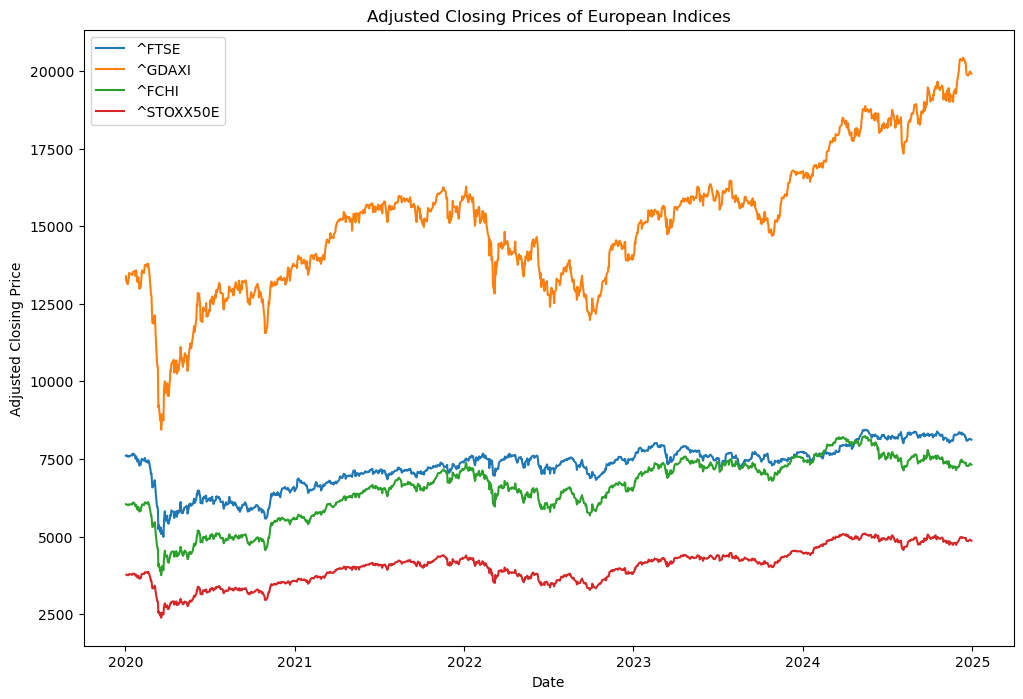

In [55]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Loop through the tickers and plot the adjusted closing prices
for ticker in tickers:
    plt.plot(data[ticker]['Adj Close'], label=ticker)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Adjusted Closing Prices of European Indices')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Summary

**General Upward Trend**: All four indices show a general upward trend over the 5-year period, indicating overall growth in the European stock market.

**Impact of the Pandemic:** We can see a sharp drop in all indices around early 2020, which corresponds to the start of the COVID-19 pandemic. This highlights the significant impact the pandemic had on global markets.

**Recovery and Growth:** Following the initial drop, the indices show a strong recovery and continued growth, although the patterns and magnitudes of growth vary.

**DAX Outperformance:** The DAX (German index) appears to have the strongest overall growth over the 5-year period.

**Euro Stoxx 50 Lagging:** The Euro Stoxx 50 seems to have the lowest overall growth compared to the other three indices.

**Volatility:** We can visually see that some indices are more volatile than others (i.e., they have bigger swings in their prices). For example, the DAX appears to be more volatile than the FTSE 100.

In [56]:
for ticker in tickers:
    data[ticker]['Daily Return'] = data[ticker]['Adj Close'].pct_change()

In [58]:
# Calculate and store annual returns in a separate dictionary
annual_returns = {}  # Create a dictionary to store annual returns

for ticker in tickers:
    # Calculate the cumulative return over the entire period
    cumulative_return = (1 + data[ticker]['Daily Return']).cumprod()[-1]

    # Annualize the return (assuming 5 years of data)
    annual_return = (cumulative_return ** (1 / 5)) - 1  # 5 because we have 5 years of data

    # Store the annual return in the dictionary
    annual_returns[ticker] = annual_return  # Store in the dictionary

C:\Users\ikech\AppData\Local\Temp\ipykernel_14304\4069553789.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (1 + data[ticker]['Daily Return']).cumprod()[-1]


In [60]:
print("Annual Returns:")
print("-" * 20)
for ticker, annual_return in annual_returns.items():  # Iterate through the dictionary
    print(f"{ticker}: {annual_return:.4f}")

Annual Returns:
--------------------
^FTSE: 0.0132
^GDAXI: 0.0826
^FCHI: 0.0390
^STOXX50E: 0.0523


## Interpretation

**FTSE 100:** The FTSE 100 had the lowest annualized return over the 5-year period, at approximately 1.32%. This indicates relatively modest growth compared to the other indices.

**DAX:** The DAX had the highest annualized return, at roughly 8.26%. This suggests strong growth in the German stock market over the 5-year period.

**CAC 40:** The CAC 40 had a moderate annualized return of about 3.90%, showing decent growth, but not as strong as the DAX.

**Euro Stoxx 50:** The Euro Stoxx 50 had an annualized return of approximately 5.23%. This indicates good growth, but less than the DAX.

## Key Observations:

DAX Outperformance: The DAX significantly outperformed the other indices, suggesting that the largest German companies experienced the most substantial growth during this period.

FTSE 100 Underperformance: The FTSE 100's relatively low return could be due to various factors, including the UK's economic conditions, the composition of the index, or currency effects related to Brexit.

Euro Stoxx 50 Moderate Growth: The Euro Stoxx 50, representing the broader Eurozone, showed moderate growth, but not as high as the DAX. This could be due to varying economic performance across the Eurozone countries.

In [61]:
all_data

Open         High          Low        Close  \
Index     Date                                                             
^FTSE     2020-01-02  7542.399902  7624.799805  7542.399902  7604.299805   
          2020-01-03  7604.299805  7626.399902  7551.000000  7622.399902   
          2020-01-06  7622.399902  7622.399902  7528.100098  7575.299805   
          2020-01-07  7575.299805  7604.600098  7562.100098  7573.899902   
          2020-01-08  7573.899902  7579.500000  7525.000000  7574.899902   
...                           ...          ...          ...          ...   
^STOXX50E 2024-12-19  4916.319824  4916.319824  4869.109863  4879.000000   
          2024-12-20  4861.589844  4872.660156  4803.200195  4862.279785   
          2024-12-23  4859.040039  4862.509766  4832.149902  4852.930176   
          2024-12-27  4854.160156  4898.879883  4847.890137  4898.879883   
          2024-12-30  4890.520020  4904.080078  4862.160156  4869.279785   

                        Adj Close     Volume  
Index     Date                                
^FTSE     2020-01-02  7604.299805  482206700  
          2020-01-03  7622.399902  475628900  
          2020-01-06  7575.299805  516783400  
          2020-01-07  7573.899902  511576100  
          2020-01-08  7574.899902  606225000  
...                           ...        ...  
^STOXX50E 2024-12-19  4879.000000   23122400  
          2024-12-20  4862.279785   52536500  
          2024-12-23  4852.930176   13206800  
          2024-12-27  4898.879883   17347300  
          2024-12-30  4869.279785   14296800  

[5078 rows x 6 columns]

In [62]:
all_data1 = pd.concat(data, keys=data.keys(), names=['Index', 'Date'])

In [63]:
all_data1

Open         High          Low        Close  \
Index     Date                                                             
^FTSE     2020-01-02  7542.399902  7624.799805  7542.399902  7604.299805   
          2020-01-03  7604.299805  7626.399902  7551.000000  7622.399902   
          2020-01-06  7622.399902  7622.399902  7528.100098  7575.299805   
          2020-01-07  7575.299805  7604.600098  7562.100098  7573.899902   
          2020-01-08  7573.899902  7579.500000  7525.000000  7574.899902   
...                           ...          ...          ...          ...   
^STOXX50E 2024-12-19  4916.319824  4916.319824  4869.109863  4879.000000   
          2024-12-20  4861.589844  4872.660156  4803.200195  4862.279785   
          2024-12-23  4859.040039  4862.509766  4832.149902  4852.930176   
          2024-12-27  4854.160156  4898.879883  4847.890137  4898.879883   
          2024-12-30  4890.520020  4904.080078  4862.160156  4869.279785   

                        Adj Close     Volume  Daily Return  Annual Return  
Index     Date                                                             
^FTSE     2020-01-02  7604.299805  482206700           NaN       0.013235  
          2020-01-03  7622.399902  475628900      0.002380       0.013235  
          2020-01-06  7575.299805  516783400     -0.006179       0.013235  
          2020-01-07  7573.899902  511576100     -0.000185       0.013235  
          2020-01-08  7574.899902  606225000      0.000132       0.013235  
...                           ...        ...           ...            ...  
^STOXX50E 2024-12-19  4879.000000   23122400     -0.015791       0.052318  
          2024-12-20  4862.279785   52536500     -0.003427       0.052318  
          2024-12-23  4852.930176   13206800     -0.001923       0.052318  
          2024-12-27  4898.879883   17347300      0.009468       0.052318  
          2024-12-30  4869.279785   14296800     -0.006042       0.052318  

[5078 rows x 8 columns]

In [64]:
for ticker, annual_return in annual_returns.items():
        all_data.loc[('Annual Return', ticker), 'Adj Close'] = annual_return

In [67]:
annual_returns_df = pd.DataFrame(annual_returns.items(), columns=['Ticker', 'Annual Return'])
annual_returns_df

,Ticker,Annual Return
0,^FTSE,0.013235
1,^GDAXI,0.082632
2,^FCHI,0.038955
3,^STOXX50E,0.052318


In [78]:
annual_returns_df['Annual Return'] = annual_returns_df['Annual Return'] * 100

In [79]:
annual_returns_df

,Ticker,Annual Return
0,^FTSE,1.323470
1,^GDAXI,8.263184
2,^FCHI,3.895517
3,^STOXX50E,5.231816


In [68]:
# Calculate daily volatility (standard deviation of daily returns)
for ticker in tickers:
    data[ticker]['Daily Volatility'] = data[ticker]['Daily Return'].rolling(window=252).std() * np.sqrt(252)  # Rolling window of 252 days (approx. 1 year)

In [71]:
print("Annualized Volatilities:")
print("-" * 25)
for ticker in tickers:
    # Calculate the AVERAGE volatility over the 5 year period
    average_volatility = data[ticker]['Daily Volatility'].mean()
    print(f"{ticker}: {average_volatility:.4f}")

Annualized Volatilities:
-------------------------
^FTSE: 0.1445
^GDAXI: 0.1769
^FCHI: 0.1758
^STOXX50E: 0.1835


In [75]:
# Calculate and store annual volatilities in a separate dictionary
annual_volatilities = {}  # Create a dictionary to store annual volatilities

for ticker in tickers:
    # Calculate the AVERAGE volatility over the 5 year period
    average_volatility = data[ticker]['Daily Volatility'].mean()
    annual_volatilities[ticker] = average_volatility

In [72]:
for ticker in tickers:
        average_volatility = data[ticker]['Daily Volatility'].mean()
        all_data.loc[('Annual Volatility', ticker), 'Adj Close'] = average_volatility

In [80]:
annual_volatilities_df = pd.DataFrame(annual_volatilities.items(), columns=['Ticker', 'Annual Volatilities'])
annual_volatilities_df

,Ticker,Annual Volatilities
0,^FTSE,0.144526
1,^GDAXI,0.176941
2,^FCHI,0.175821
3,^STOXX50E,0.183544


**FTSE 100:** 0.1445 - The FTSE 100 has the lowest volatility among the four indices. This suggests that it has been the most stable and least risky (in terms of price fluctuations) over the past 5 years.

**DAX:** 0.1769 - The DAX has a higher volatility compared to the FTSE 100. This indicates that it has experienced more significant price swings and is considered riskier than the FTSE 100.

**CAC 40:** 0.1758 - The CAC 40 has a volatility very similar to the DAX. This suggests that it has a comparable level of risk.

**Euro Stoxx 50:** 0.1835 - The Euro Stoxx 50 has the highest volatility among the four indices. This implies that it has experienced the most significant price fluctuations and is considered the riskiest of the four.

## Key Observations and Interpretations:

**Risk-Return Tradeoff:** Generally, higher returns come with higher risk. In this case, the DAX, which had the highest annualized return, also has a relatively high volatility. The FTSE 100, which had the lowest return, has the lowest volatility. This illustrates the classic risk-return tradeoff in finance.

**Volatility and Investment Strategy:** Investors with a lower risk tolerance might prefer the FTSE 100 due to its lower volatility, even though its return is also lower. Investors seeking higher returns and willing to accept more risk might consider the DAX or the Euro Stoxx 50.

**Comparison:** It's important to remember that these volatilities are annualized and represent the average yearly fluctuation over the 5-year period. The actual day-to-day or month-to-month volatility might have varied.

**Combining Return and Volatility Analysis:**

Now that we have both the annualized returns and volatilities, we can make more informed comparisons:

**DAX:** Highest return, relatively high volatility. A higher-risk, higher-reward option.

**FTSE 100:** Lowest return, lowest volatility. A lower-risk, lower-reward option.

**CAC 40:** Moderate return, moderate volatility. A middle-ground option.

**Euro Stoxx 50:** Moderate return, highest volatility. A higher-risk option with potentially moderate rewards.

In [82]:
 annual_returns_df.to_csv("annual_returns.csv")

In [83]:
annual_volatilities_df.to_csv("annual_volatilities.csv")